In [72]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load data
data_path = "E:\\LAI_prediction_2000to2020\\Merged_Data2002to2020.csv"
data = pd.read_csv(data_path)
print(data.columns)

# Preprocess data
data['date'] = pd.to_datetime(data['date'])
data = data.set_index('date')
print('Preprocess data finished!')


# Split into training and testing sets
train_data = data[data.index.year <= 2015]
test_data = data[data.index.year > 2015]
print('Split into training and testing sets finished!')


# Normalize data
scaler = MinMaxScaler()
train_data_normalized = scaler.fit_transform(train_data)
test_data_normalized = scaler.transform(test_data)
print('Normalize data finished!')

# Prepare data for LSTM
def create_dataset(data, look_back=1):
    X, Y = [], []
    for i in range(len(data) - look_back - 1):
        a = data[i:(i + look_back), :]
        X.append(a)
        Y.append(data[i + look_back, 1:4])  # GPP, LAI, NDVI columns
    return np.array(X), np.array(Y)

look_back = 1
X_train, y_train = create_dataset(train_data_normalized, look_back)
X_test, y_test = create_dataset(test_data_normalized, look_back)

# Create LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(3))
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X_train, y_train, epochs=500, batch_size=4, verbose=2)

Index(['date', 'GPP', 'LAI', 'NDVI', 'dewpoint_2m_temperature',
       'maximum_2m_air_temperature', 'mean_2m_air_temperature',
       'minimum_2m_air_temperature', 'surface_pressure', 'total_precipitation',
       'u_component_of_wind_10m', 'v_component_of_wind_10m'],
      dtype='object')
Preprocess data finished!
Split into training and testing sets finished!
Normalize data finished!
Epoch 1/500
77/77 - 1s - loss: 0.1028
Epoch 2/500
77/77 - 0s - loss: 0.0261
Epoch 3/500
77/77 - 0s - loss: 0.0220
Epoch 4/500
77/77 - 0s - loss: 0.0200
Epoch 5/500
77/77 - 0s - loss: 0.0191
Epoch 6/500
77/77 - 0s - loss: 0.0185
Epoch 7/500
77/77 - 0s - loss: 0.0180
Epoch 8/500
77/77 - 0s - loss: 0.0178
Epoch 9/500
77/77 - 0s - loss: 0.0178
Epoch 10/500
77/77 - 0s - loss: 0.0175
Epoch 11/500
77/77 - 0s - loss: 0.0175
Epoch 12/500
77/77 - 0s - loss: 0.0175
Epoch 13/500
77/77 - 0s - loss: 0.0176
Epoch 14/500
77/77 - 0s - loss: 0.0176
Epoch 15/500
77/77 - 0s - loss: 0.0175
Epoch 16/500
77/77 - 0s - loss: 0.

Epoch 199/500
77/77 - 0s - loss: 0.0142
Epoch 200/500
77/77 - 0s - loss: 0.0144
Epoch 201/500
77/77 - 0s - loss: 0.0145
Epoch 202/500
77/77 - 0s - loss: 0.0145
Epoch 203/500
77/77 - 0s - loss: 0.0145
Epoch 204/500
77/77 - 0s - loss: 0.0143
Epoch 205/500
77/77 - 0s - loss: 0.0141
Epoch 206/500
77/77 - 0s - loss: 0.0144
Epoch 207/500
77/77 - 0s - loss: 0.0144
Epoch 208/500
77/77 - 0s - loss: 0.0145
Epoch 209/500
77/77 - 0s - loss: 0.0147
Epoch 210/500
77/77 - 0s - loss: 0.0146
Epoch 211/500
77/77 - 0s - loss: 0.0143
Epoch 212/500
77/77 - 0s - loss: 0.0145
Epoch 213/500
77/77 - 0s - loss: 0.0149
Epoch 214/500
77/77 - 0s - loss: 0.0144
Epoch 215/500
77/77 - 0s - loss: 0.0144
Epoch 216/500
77/77 - 0s - loss: 0.0143
Epoch 217/500
77/77 - 0s - loss: 0.0143
Epoch 218/500
77/77 - 0s - loss: 0.0146
Epoch 219/500
77/77 - 0s - loss: 0.0143
Epoch 220/500
77/77 - 0s - loss: 0.0144
Epoch 221/500
77/77 - 0s - loss: 0.0145
Epoch 222/500
77/77 - 0s - loss: 0.0143
Epoch 223/500
77/77 - 0s - loss: 0.0142


Epoch 404/500
77/77 - 0s - loss: 0.0133
Epoch 405/500
77/77 - 0s - loss: 0.0135
Epoch 406/500
77/77 - 0s - loss: 0.0135
Epoch 407/500
77/77 - 0s - loss: 0.0133
Epoch 408/500
77/77 - 0s - loss: 0.0133
Epoch 409/500
77/77 - 0s - loss: 0.0134
Epoch 410/500
77/77 - 0s - loss: 0.0136
Epoch 411/500
77/77 - 0s - loss: 0.0138
Epoch 412/500
77/77 - 0s - loss: 0.0135
Epoch 413/500
77/77 - 0s - loss: 0.0133
Epoch 414/500
77/77 - 0s - loss: 0.0134
Epoch 415/500
77/77 - 0s - loss: 0.0135
Epoch 416/500
77/77 - 0s - loss: 0.0133
Epoch 417/500
77/77 - 0s - loss: 0.0136
Epoch 418/500
77/77 - 0s - loss: 0.0134
Epoch 419/500
77/77 - 0s - loss: 0.0134
Epoch 420/500
77/77 - 0s - loss: 0.0135
Epoch 421/500
77/77 - 0s - loss: 0.0133
Epoch 422/500
77/77 - 0s - loss: 0.0133
Epoch 423/500
77/77 - 0s - loss: 0.0134
Epoch 424/500
77/77 - 0s - loss: 0.0132
Epoch 425/500
77/77 - 0s - loss: 0.0136
Epoch 426/500
77/77 - 0s - loss: 0.0135
Epoch 427/500
77/77 - 0s - loss: 0.0135
Epoch 428/500
77/77 - 0s - loss: 0.0133


In [73]:
# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [74]:
train_rmse = np.sqrt(mean_squared_error(y_train, train_predict[:, 0:3]))
test_rmse = np.sqrt(mean_squared_error(y_test, test_predict[:, 0:3]))
print(f'Train RMSE: {train_rmse:.3f}')
print(f'Test RMSE: {test_rmse:.3f}')

Train RMSE: 0.113
Test RMSE: 0.140


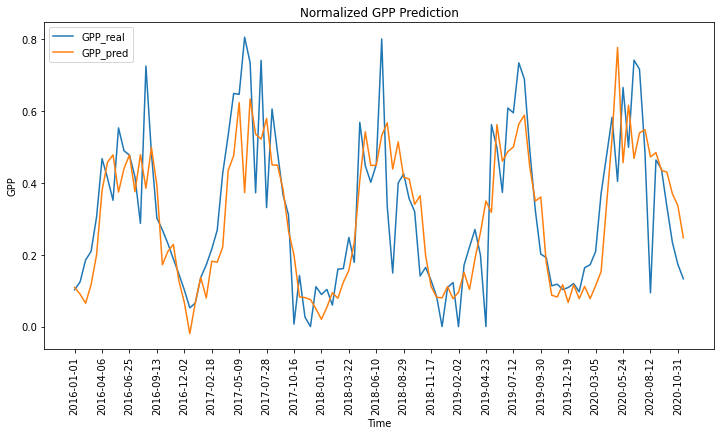

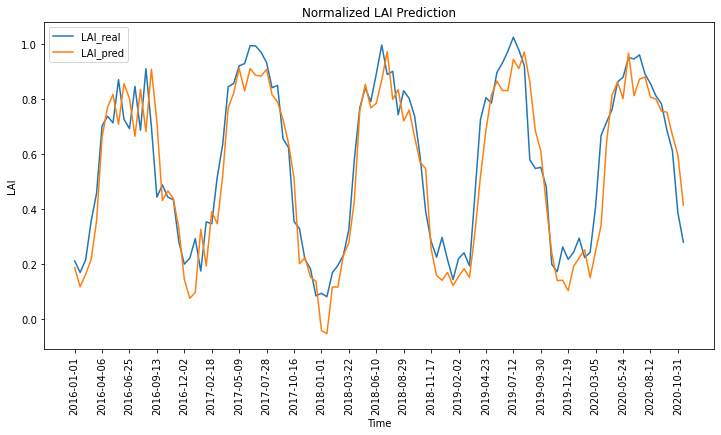

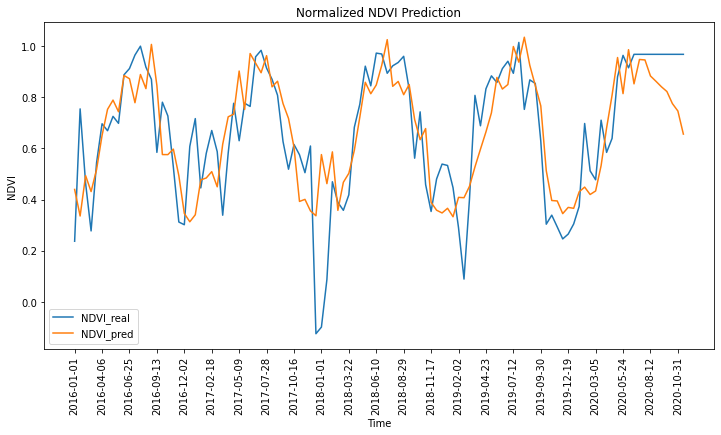

In [75]:
# Extract predicted and actual values for each variable
GPP_real, LAI_real, NDVI_real = y_test[:, 0], y_test[:, 1], y_test[:, 2]
GPP_pred, LAI_pred, NDVI_pred = test_predict[:, 0], test_predict[:, 1], test_predict[:, 2]

# Plot GPP
plt.figure(figsize=(12, 6))
plt.plot(GPP_real, label='GPP_real')
plt.plot(GPP_pred, label='GPP_pred')
plt.title('Normalized GPP Prediction')
plt.xlabel('Time')
plt.ylabel('GPP')
tick_frequency = 5
plt.xticks(range(0, len(test_data.index), tick_frequency), test_data.index[::tick_frequency].strftime('%Y-%m-%d'), rotation=90)
plt.legend()
plt.show()

# Plot LAI
plt.figure(figsize=(12, 6))
plt.plot(LAI_real, label='LAI_real')
plt.plot(LAI_pred, label='LAI_pred')
plt.title('Normalized LAI Prediction')
plt.xlabel('Time')
plt.ylabel('LAI')
tick_frequency = 5
plt.xticks(range(0, len(test_data.index), tick_frequency), test_data.index[::tick_frequency].strftime('%Y-%m-%d'), rotation=90)
plt.legend()
plt.show()

# Plot NDVI
plt.figure(figsize=(12, 6))
plt.plot(NDVI_real, label='NDVI_real')
plt.plot(NDVI_pred, label='NDVI_pred')
plt.title('Normalized NDVI Prediction')
tick_frequency = 5
plt.xticks(range(0, len(test_data.index), tick_frequency), test_data.index[::tick_frequency].strftime('%Y-%m-%d'), rotation=90)
plt.xlabel('Time')
plt.ylabel('NDVI')
plt.legend()
plt.show()

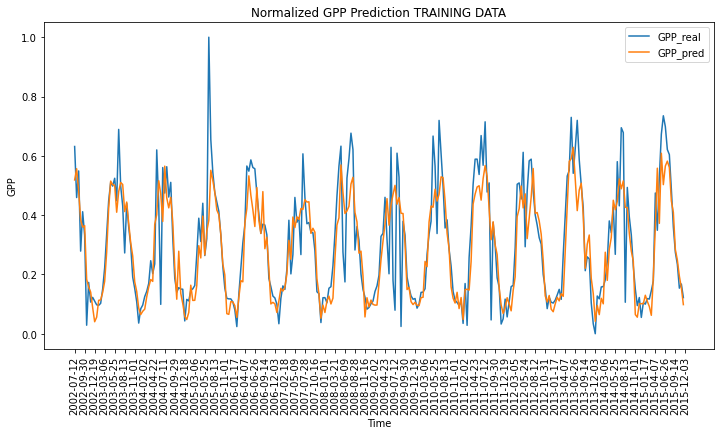

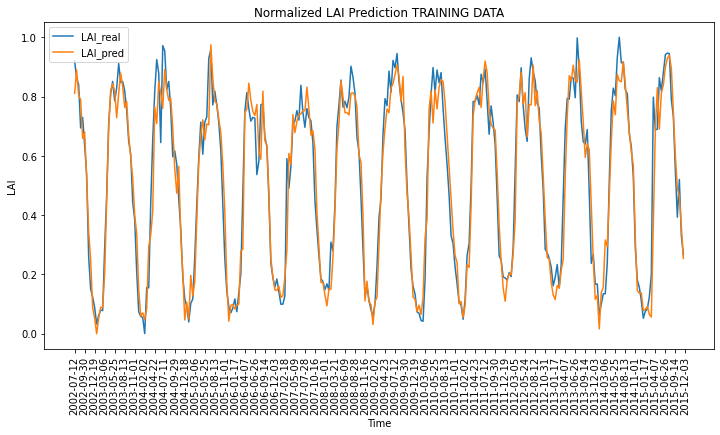

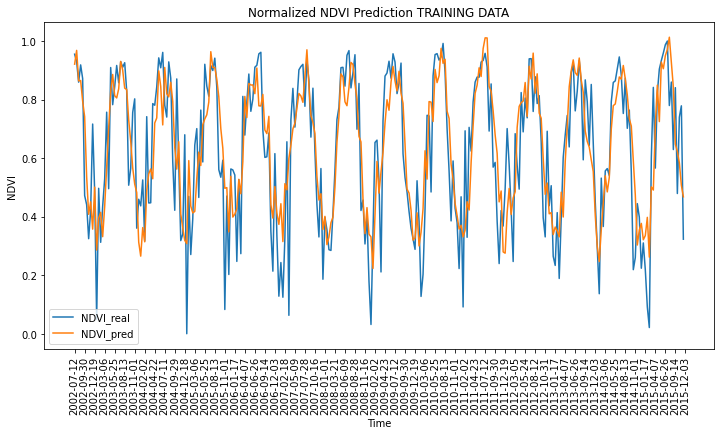

In [77]:
# Extract predicted and actual values for each variable
GPP_real, LAI_real, NDVI_real = y_train[:, 0], y_train[:, 1], y_train[:, 2]
GPP_pred, LAI_pred, NDVI_pred = train_predict[:, 0], train_predict[:, 1], train_predict[:, 2]

# Plot GPP
plt.figure(figsize=(12, 6))
plt.plot(GPP_real, label='GPP_real')
plt.plot(GPP_pred, label='GPP_pred')
plt.title('Normalized GPP Prediction TRAINING DATA')
plt.xlabel('Time')
plt.ylabel('GPP')
tick_frequency = 5
plt.xticks(range(0, len(train_data.index), tick_frequency), train_data.index[::tick_frequency].strftime('%Y-%m-%d'), rotation=90)
plt.legend()
plt.show()

# Plot LAI
plt.figure(figsize=(12, 6))
plt.plot(LAI_real, label='LAI_real')
plt.plot(LAI_pred, label='LAI_pred')
plt.title('Normalized LAI Prediction TRAINING DATA')
plt.xlabel('Time')
plt.ylabel('LAI')
tick_frequency = 5
plt.xticks(range(0, len(train_data.index), tick_frequency), train_data.index[::tick_frequency].strftime('%Y-%m-%d'), rotation=90)
plt.legend()
plt.show()

# Plot NDVI
plt.figure(figsize=(12, 6))
plt.plot(NDVI_real, label='NDVI_real')
plt.plot(NDVI_pred, label='NDVI_pred')
plt.title('Normalized NDVI Prediction TRAINING DATA')
tick_frequency = 5
plt.xticks(range(0, len(train_data.index), tick_frequency), train_data.index[::tick_frequency].strftime('%Y-%m-%d'), rotation=90)
plt.xlabel('Time')
plt.ylabel('NDVI')
plt.legend()
plt.show()

In [78]:
# Invert predictions
train_predict_actual = scaler.inverse_transform(np.hstack((train_data_normalized[look_back:-1, 0:1], train_predict, train_data_normalized[look_back:-1, 4:])))
test_predict_actual = scaler.inverse_transform(np.hstack((test_data_normalized[look_back:-1, 0:1], test_predict, test_data_normalized[look_back:-1, 4:])))
y_train_actual = scaler.inverse_transform(train_data_normalized)[look_back:-1, 1:4]
y_test_actual = scaler.inverse_transform(test_data_normalized)[look_back:-1, 1:4]

ValueError: operands could not be broadcast together with shapes (305,3) (11,) (305,3) 

In [80]:
train_rmse = np.sqrt(mean_squared_error(y_train_actual, train_predict_actual[:, 1:4]))
test_rmse = np.sqrt(mean_squared_error(y_test_actual, test_predict_actual[:, 1:4]))
print(f'Train RMSE: {train_rmse:.3f}')
print(f'Test RMSE: {test_rmse:.3f}')

Train RMSE: 3.059
Test RMSE: 3.570


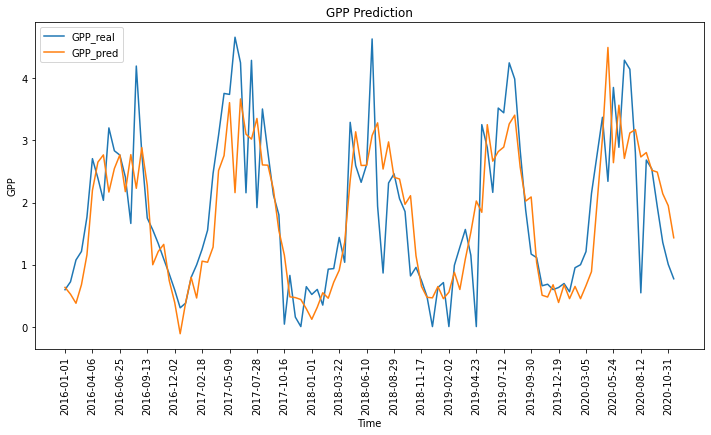

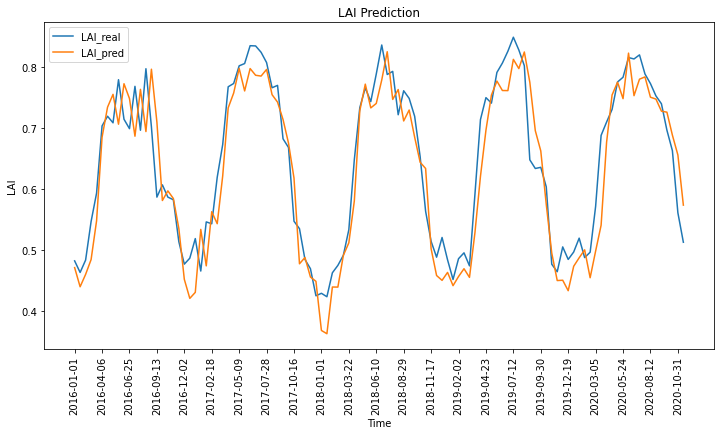

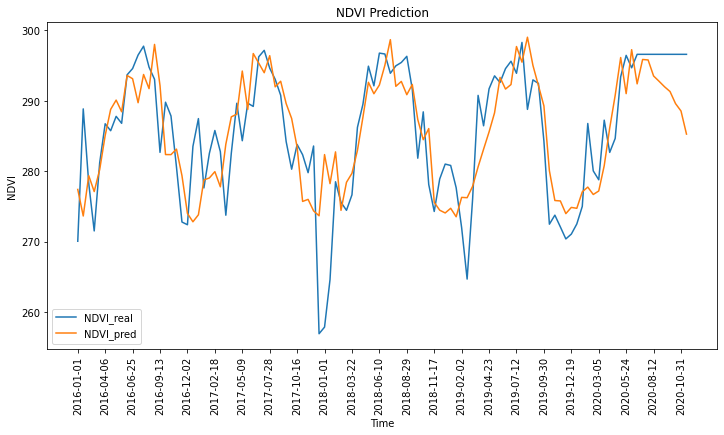

In [81]:
# Extract predicted and actual values for each variable
GPP_real, LAI_real, NDVI_real = y_test_actual[:, 0], y_test_actual[:, 1], y_test_actual[:, 2]
GPP_pred, LAI_pred, NDVI_pred = test_predict_actual[:, 1], test_predict_actual[:, 2], test_predict_actual[:, 3]

# Plot GPP
plt.figure(figsize=(12, 6))
plt.plot(GPP_real, label='GPP_real')
plt.plot(GPP_pred, label='GPP_pred')
plt.title('GPP Prediction')
plt.xlabel('Time')
plt.ylabel('GPP')
plt.legend()
tick_frequency = 5
plt.xticks(range(0, len(test_data.index), tick_frequency), test_data.index[::tick_frequency].strftime('%Y-%m-%d'), rotation=90)
plt.show()

# Plot LAI
plt.figure(figsize=(12, 6))
plt.plot(LAI_real, label='LAI_real')
plt.plot(LAI_pred, label='LAI_pred')
plt.title('LAI Prediction')
plt.xlabel('Time')
plt.ylabel('LAI')
plt.legend()
tick_frequency = 5
plt.xticks(range(0, len(test_data.index), tick_frequency), test_data.index[::tick_frequency].strftime('%Y-%m-%d'), rotation=90)
plt.show()

# Plot NDVI
plt.figure(figsize=(12, 6))
plt.plot(NDVI_real, label='NDVI_real')
plt.plot(NDVI_pred, label='NDVI_pred')
plt.title('NDVI Prediction')
plt.xlabel('Time')
plt.ylabel('NDVI')
tick_frequency = 5
plt.xticks(range(0, len(test_data.index), tick_frequency), test_data.index[::tick_frequency].strftime('%Y-%m-%d'), rotation=90)
plt.legend()
plt.show()